In [ ]:
#!/usr/bin/python3
import paramiko
from datetime import datetime
import time
import os
import multiprocessing
import subprocess
import requests

devices = ['192.168.133.26']
switchs = ['192.168.133.71', '192.168.133.70'] #71 -1st!!!!!
#switchs = ['192.168.137.2']

DNULL = open(os.devnull, 'w')

def log_(*args):
    f = open('/var/log/switches/log.txt', 'a')
    print(datetime.now(), *args)
    print(datetime.now(), *args, file=f)
    f.close()




def worker(devices):
    mp_queue = multiprocessing.Queue()
    processes = []
    for device in devices:
        p = multiprocessing.Process(target=pings, args=(device, mp_queue))
        processes.append(p)
        p.start()
    for p in processes:
        p.join()
    results = {True: [], False: []}
    for p in processes:
        key, value = mp_queue.get()
        results[key] += [value]
    return results[True], results[False]





def try_reboot():
    for s in switchs:
        c = 0
        while c < 10:
            Result, data = reboot(s)
            log_(s, Result, data)
            if Result == True:
                requests.get('https://api.telegram.org/bot580440068:AAHS2uckeIu-ygxOKEvCaGrPExdK9COf_rA/sendmessage?chat_id=389354498&text=switches reboot initiated')
                break
            time.sleep(5)
            c += 1

def chek_before_reboot(count=3, timesleep=30):
    c = 0
    for i in range(count):
        success, failed = worker(devices)
        if failed != []:
            c += 1
            time.sleep(timesleep)
    if c == count:
        try_reboot()

def reboot(ip):
    try:
        sshcli = paramiko.SSHClient()
        sshcli.set_missing_host_key_policy(paramiko.AutoAddPolicy())
        sshcli.connect(ip, port=22, username='admin', password='85Bs341p123D')
        stdin, stdout, stderr = sshcli.exec_command('system reboot')
        data = (stdout.read() + stderr.read()).decode('utf-8').strip().split("\n")
        sshcli.close()
        return True, data
    except Exception as err:
        print('Error in def reboot',err)
        return False, None



# if __name__ == "__main__":
#     chek_before_reboot(count=3, timesleep=20)

In [20]:
def SSHRequest(ip, user, passw, command):
    sshcli = paramiko.SSHClient()
    sshcli.set_missing_host_key_policy(paramiko.AutoAddPolicy())
    sshcli.connect(ip, port=22, username=user, password=passw)
    stdin, stdout, stderr = sshcli.exec_command('{com}'.format(com=command))
    data = (stdout.read() + stderr.read()).decode('utf-8').strip().split("\n")
    sshcli.close()
    return data

In [ ]:
def decor(func):
    def transform():
        

def pings(host, mp_queue):
    response = subprocess.call(["/bin/ping", "-c", "2", "-w", '2', host], stdout=DNULL)
    if response == 0:
        print(host, 'is up!')
        result = True
    else:
        log_(host, 'is down!')
        result = False
    mp_queue.put((result, host))

def multi_worker(devices_list, func):
    mp_queue = multiprocessing.Queue()
    processes = []
    for device in devices_list:
        p = multiprocessing.Process(target=func, args=(device, mp_queue))
        processes.append(p)
        p.start()
    for p in processes:
        p.join()
    results = {True: [], False: []}
    for p in processes:
        key, value = mp_queue.get()
        results[key] += [value]
    return results[True], results[False]

In [1]:
#import random
import multiprocessing
import functools
import paramiko

class my_decorator(object):
    def __init__(self, target):
        self.target = target
        try:
            functools.update_wrapper(self, target)
        except:
            pass

    def __call__(self, candidates, args):
        f = []
        for candidate in candidates:
            f.append(self.target([candidate], args)[0])
        return f

def func(candidates, args):
    f = []
    foo = args.pop('func')
    for c in candidates:
        try:
            res = foo(c, **args)
            f.append({str(c): res})
        except Exception as err:
            f.append({str(c): 'Failed with error: %s'%err})
    return f


def run_multi_worker(List, Func, processes=100, **kwargs):
    kwargs.update({'func': Func})
    pool = multiprocessing.Pool(processes=len(List))
    results = [pool.apply_async(my_decorator(func), ([c], kwargs)) for c in List]
    pool.close()
    res = {}
    for r in results:
        res.update(r.get()[0])
    return res



def test(x, oper):
    #print(x)
    if oper == '+':
        return x + x
    else:
        return x - x
    
    
def SSHRequest(ip, command, user='admin', passw='85Bs341p'):
    sshcli = paramiko.SSHClient()
    sshcli.set_missing_host_key_policy(paramiko.AutoAddPolicy())
    try:
        sshcli.connect(ip, port=22, username=user, password=passw, allow_agent=False, look_for_keys=False)
        stdin, stdout, stderr = sshcli.exec_command('{com}'.format(com=command))
        data = (stdout.read() + stderr.read()).decode('utf-8').strip().split("\n")
        sshcli.close()
    except Exception as err:
        return err
    return data





L = [4,5,6,7,8]
run_multi_worker(L, test, oper='-')

# run_multi_worker(data, SSHRequest, processes= 70, command=comm)


{'4': 0, '5': 0, '6': 0, '7': 0, '8': 0}

In [307]:
a = [{'asd':'qwe'},{'asda':'sdgsdg'}]
zip(a)

In [302]:
dict(a)

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [ ]:
sshcli = paramiko.SSHClient()
sshcli.set_missing_host_key_policy(paramiko.AutoAddPolicy())
sshcli.connect(ip, port=22, username=user, password=passw, allow_agent=False,look_for_keys=False)
stdin, stdout, stderr = sshcli.exec_command('{com}'.format(com=command))
data = (stdout.read() + stderr.read()).decode('utf-8').strip().split("\n")
sshcli.close()

In [271]:
sshcli.connect('10.9.0.138', port=22, username='admin', password='85Bs341p', allow_agent=False,look_for_keys=False)

In [260]:
def ttt(**kwargs):
    return kwargs
ttt(id=10, ip=19)

{'id': 10, 'ip': 19}

In [283]:
data = ['10.9.1.62', '10.9.1.38', '10.9.0.50', '10.9.1.126', '10.9.1.130', '10.9.1.94', '10.9.0.190', '10.9.0.78', '10.9.0.170', '10.9.0.242', '10.9.1.118', '10.9.0.154', '10.9.0.86', '10.9.0.146', '10.9.1.134', '10.9.0.122', '10.9.0.14', '10.9.0.214', '10.9.0.106', '10.9.1.106', '10.9.0.162', '10.9.0.30', '10.9.0.10', '10.9.0.218', '10.9.0.126', '10.9.0.182', '10.9.0.66', '10.9.0.202', '10.9.1.82', '10.9.0.58', '10.9.1.78', '10.9.0.118', '10.9.1.46', '10.9.0.166', '10.9.0.98', '10.9.0.38', '10.9.0.18', '10.9.0.194', '10.9.0.46', '10.9.0.62', '10.9.0.158', '10.9.1.54', '10.9.1.86', '10.9.0.186', '10.9.0.246', '10.9.0.222', '10.9.0.210', '10.9.0.102', '10.9.0.174', '10.9.1.34', '10.9.0.90', '10.9.0.94', '10.9.0.114', '10.9.0.70', '10.9.1.30', '10.9.1.90', '10.9.0.54', '10.9.0.74', '10.9.0.34', '10.9.0.138', '10.9.0.26']
comm = 'ip address print'
# data = ['10.9.1.62', '10.9.0.138','10.9.1.38', '10.9.0.50', '10.9.1.126']

In [284]:
run_multi_worker(data, SSHRequest, processes= 70, command=comm)

Exception: Error reading SSH protocol banner
Exception: Error reading SSH protocol banner
Exception: Error reading SSH protocol banner
Traceback (most recent call last):
Exception: Error reading SSH protocol banner
Exception: Error reading SSH protocol banner
Traceback (most recent call last):
Exception: Error reading SSH protocol banner
Traceback (most recent call last):
Exception: Error reading SSH protocol banner
Exception: Error reading SSH protocol banner
Exception: Error reading SSH protocol banner
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2044, in _check_banner
Exception: Error reading SSH protocol banner
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2044, in _check_banner
Exception: Error reading SSH protocol banner
Exception: Error reading SSH protocol banner
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2044, in _check_banner
Traceback (most rec

  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2044, in _check_banner
Traceback (most recent call last):
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2044, in _check_banner
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2044, in _check_banner
Exception: Error reading SSH protocol banner[Errno 104] Connection reset by peer
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2044, in _check_banner
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2044, in _check_banner
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 353, in readline
    buf = self.packetizer.readline(timeout)
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2044, in _check_ba

  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 353, in readline
    buf += self._read_timeout(timeout)
    buf = self.packetizer.readline(timeout)
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 353, in readline
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2044, in _check_banner
    buf = self.packetizer.readline(timeout)
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 542, in _read_timeout
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 353, in readline
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 353, in readline
    buf = self.packetizer.readline(timeout)
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 353, in readline
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 353, in 

    buf += self._read_timeout(timeout)
    buf += self._read_timeout(timeout)
EOFError
EOFError
    raise EOFError()
    buf += self._read_timeout(timeout)
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 542, in _read_timeout
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 542, in _read_timeout
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 542, in _read_timeout
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 542, in _read_timeout
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 542, in _read_timeout
    raise EOFError()
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/packet.py", line 353, in readline
    buf += self._read_timeout(timeout)
    buf += self._read_timeout(timeout)
EOFError
    raise EOFError()
    buf += self._read_timeout(timeout)
During handling of the above exce






During handling of the above exception, another exception occurred:
During handling of the above exception, another exception occurred:

Traceback (most recent call last):

During handling of the above exception, another exception occurred:
ConnectionResetError: [Errno 104] Connection reset by peer
Traceback (most recent call last):
EOFError
During handling of the above exception, another exception occurred:

During handling of the above exception, another exception occurred:


EOFError

During handling of the above exception, another exception occurred:

    self._check_banner()
During handling of the above exception, another exception occurred:

    raise EOFError()
Traceback (most recent call last):
During handling of the above exception, another exception occurred:
During handling of the above exception, another exception occurred:
EOFError


During handling of the above exception, another exception occurred:
During handling of the above exception, another exception occurred:


Traceback (most recent call last):
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 1893, in run

    self._check_banner()
Traceback (most recent call last):
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 1893, in run
Traceback (most recent call last):
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2049, in _check_banner
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2049, in _check_banner
Traceback (most recent call last):
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 1893, in run
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 1893, in run
Traceback (most recent call last):

  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2049, in _check_banner
    'Error reading SSH protocol banner' + str(e)
    s

    'Error reading SSH protocol banner' + str(e)
    self._check_banner()
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2049, in _check_banner
    'Error reading SSH protocol banner' + str(e)
    self._check_banner()
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2049, in _check_banner
    'Error reading SSH protocol banner' + str(e)
    self._check_banner()
    'Error reading SSH protocol banner' + str(e)
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 1893, in run
    'Error reading SSH protocol banner' + str(e)
    'Error reading SSH protocol banner' + str(e)
Traceback (most recent call last):
    self._check_banner()
    'Error reading SSH protocol banner' + str(e)
Traceback (most recent call last):
  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2049, in _check_banner
  File "/home/blm/venvs/jupyter/lib/python3.6/sit

    'Error reading SSH protocol banner' + str(e)


  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2049, in _check_banner
paramiko.ssh_exception.SSHException: Error reading SSH protocol banner
    self._check_banner()



    'Error reading SSH protocol banner' + str(e)

    'Error reading SSH protocol banner' + str(e)

paramiko.ssh_exception.SSHException: Error reading SSH protocol banner

    'Error reading SSH protocol banner' + str(e)
paramiko.ssh_exception.SSHException: Error reading SSH protocol banner
    'Error reading SSH protocol banner' + str(e)


paramiko.ssh_exception.SSHException: Error reading SSH protocol banner

paramiko.ssh_exception.SSHException: Error reading SSH protocol banner




paramiko.ssh_exception.SSHException: Error reading SSH protocol banner

  File "/home/blm/venvs/jupyter/lib/python3.6/site-packages/paramiko/transport.py", line 2049, in _check_banner
    'Error reading SSH protocol banner' + str(e)
paramiko.ssh_ex

[{'10.9.1.62': paramiko.ssh_exception.SSHException('Error reading SSH protocol banner')},
 {'10.9.1.38': paramiko.ssh_exception.SSHException('Error reading SSH protocol banner')},
 {'10.9.0.50': paramiko.ssh_exception.SSHException('Error reading SSH protocol banner')},
 {'10.9.1.126': paramiko.ssh_exception.SSHException('Error reading SSH protocol banner')},
 {'10.9.1.130': paramiko.ssh_exception.SSHException('Error reading SSH protocol banner')},
 {'10.9.1.94': paramiko.ssh_exception.SSHException('Error reading SSH protocol banner')},
 {'10.9.0.190': paramiko.ssh_exception.SSHException('Error reading SSH protocol banner')},
 {'10.9.0.78': paramiko.ssh_exception.SSHException('Error reading SSH protocol banner')},
 {'10.9.0.170': paramiko.ssh_exception.SSHException('Error reading SSH protocol banner')},
 {'10.9.0.242': paramiko.ssh_exception.SSHException('Error reading SSH protocol banner')},
 {'10.9.1.118': paramiko.ssh_exception.SSHException('Error reading SSH protocol banner')},
 {'1

In [1]:
import time
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )
        
L = range(16)
for l in log_progress(L):
    time.sleep(0.1)

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import pickle
import os

D = []
log_path = 'temp/bitfinex_ob_log_ver2'
for f in os.listdir(log_path):
    fil = '%s/%s' %(log_path, f)#, datetime.now().strftime('%Y_%m_%d-%H'))
    with open(fil, 'rb') as f:
        while True:
            try:
                D.append(pickle.load(f))
            except EOFError:
                break
print(len(D))
# df = pd.read_pickle('bitfinex_ob_log_%s_.pkl' %datetime.today().strftime('%Y_%m_%d'))
# df = pd.read_pickle('temp/bitfinex_ob_log_2018_09_25-03.pkl') #bitfinex_ob_log_2018_09_18-09.pkl  bitfinex_ob_log_2018_09_18-10.pkl



36001


In [24]:
df = pd.concat(D)
#del D


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 540015 entries, (2018-09-25 07:00:00, 0) to (2018-09-25 03:59:59, 14)
Data columns (total 8 columns):
(bid, num)      539882 non-null float64
(bid, summ)     539882 non-null float64
(bid, total)    539882 non-null float64
(bid, price)    539882 non-null float64
(ask, price)    539957 non-null float64
(ask, total)    539957 non-null float64
(ask, summ)     539957 non-null float64
(ask, num)      539957 non-null float64
dtypes: float64(8)
memory usage: 34.7 MB


In [26]:
#Объявляем константы
frequency = 2 # sek
per = 60 # указать в секундах
per_num = 5
positions = 15
per = int(per // frequency)

In [27]:
df[::positions].head(12)

bid                                 ask             \
                           num      summ     total   price   price      total   
time                                                                            
2018-09-25 07:00:00.000 0  8.0  5.298034  5.298034  6461.5  6461.6  77.039733   
2018-09-25 07:00:00.500 0  8.0  5.298034  5.298034  6461.5  6461.6  77.039733   
2018-09-25 07:00:01.000 0  9.0  5.344473  5.344473  6461.5  6461.6  77.039733   
2018-09-25 07:00:01.500 0  9.0  5.344473  5.344473  6461.5  6461.6  77.039733   
2018-09-25 07:00:02.500 0  9.0  5.341473  5.341473  6461.5  6461.6  77.039733   
                        0  9.0  5.341473  5.341473  6461.5  6461.6  77.039733   
2018-09-25 07:00:03.000 0  9.0  5.341473  5.341473  6461.5  6461.6  77.039733   
2018-09-25 07:00:03.500 0  9.0  5.341473  5.341473  6461.5  6461.6  77.039733   
2018-09-25 07:00:04.500 0  9.0  5.339473  5.339473  6461.5  6461.6  77.029733   
                        0  9.0  5.339473  5.339473  6461.5  6461.6  77.029733   
2018-09-25 07:00:05.000 0  4.0  3.263473  3.263473  6461.5  6461.6  77.013733   
2018-09-25 07:00:05.500 0  4.0  3.261347  3.261347  6461.5  6461.6  77.013733   

                                           
                                summ  num  
time                                       
2018-09-25 07:00:00.000 0  77.039733  3.0  
2018-09-25 07:00:00.500 0  77.039733  3.0  
2018-09-25 07:00:01.000 0  77.039733  3.0  
2018-09-25 07:00:01.500 0  77.039733  3.0  
2018-09-25 07:00:02.500 0  77.039733  3.0  
                        0  77.039733  3.0  
2018-09-25 07:00:03.000 0  77.039733  3.0  
2018-09-25 07:00:03.500 0  77.039733  3.0  
2018-09-25 07:00:04.500 0  77.029733  3.0  
                        0  77.029733  3.0  
2018-09-25 07:00:05.000 0  77.013733  3.0  
2018-09-25 07:00:05.500 0  77.013733  3.0

In [28]:
#Избавляемся от дубликатов записей
df.index.names = ['time', 'position']
df_t = df.reset_index(level=[0,1])
df_t = df_t[::].drop_duplicates(subset=[('time', ''),('position', '')], keep='first')
df = df_t.set_index(['time', 'position'])
df[::positions].head(positions)

bid                                 ask  \
                                  num      summ     total   price   price   
time                    position                                            
2018-09-25 07:00:00.000 0         8.0  5.298034  5.298034  6461.5  6461.6   
2018-09-25 07:00:00.500 0         8.0  5.298034  5.298034  6461.5  6461.6   
2018-09-25 07:00:01.000 0         9.0  5.344473  5.344473  6461.5  6461.6   
2018-09-25 07:00:01.500 0         9.0  5.344473  5.344473  6461.5  6461.6   
2018-09-25 07:00:02.500 0         9.0  5.341473  5.341473  6461.5  6461.6   
2018-09-25 07:00:03.000 0         9.0  5.341473  5.341473  6461.5  6461.6   
2018-09-25 07:00:03.500 0         9.0  5.341473  5.341473  6461.5  6461.6   
2018-09-25 07:00:04.500 0         9.0  5.339473  5.339473  6461.5  6461.6   
2018-09-25 07:00:05.000 0         4.0  3.263473  3.263473  6461.5  6461.6   
2018-09-25 07:00:05.500 0         4.0  3.261347  3.261347  6461.5  6461.6   
2018-09-25 07:00:06.000 0         4.0  3.019184  3.019184  6461.5  6461.6   
2018-09-25 07:00:06.500 0         4.0  3.019184  3.019184  6461.5  6461.6   
2018-09-25 07:00:07.500 0         1.0  0.077316  0.077316  6460.1  6461.6   
2018-09-25 07:00:08.000 0         1.0  0.074600  0.074600  6461.0  6461.1   
2018-09-25 07:00:08.500 0         1.0  0.074600  0.074600  6461.0  6461.1   

                                                             
                                      total       summ  num  
time                    position                             
2018-09-25 07:00:00.000 0         77.039733  77.039733  3.0  
2018-09-25 07:00:00.500 0         77.039733  77.039733  3.0  
2018-09-25 07:00:01.000 0         77.039733  77.039733  3.0  
2018-09-25 07:00:01.500 0         77.039733  77.039733  3.0  
2018-09-25 07:00:02.500 0         77.039733  77.039733  3.0  
2018-09-25 07:00:03.000 0         77.039733  77.039733  3.0  
2018-09-25 07:00:03.500 0         77.039733  77.039733  3.0  
2018-09-25 07:00:04.500 0         77.029733  77.029733  3.0  
2018-09-25 07:00:05.000 0         77.013733  77.013733  3.0  
2018-09-25 07:00:05.500 0         77.013733  77.013733  3.0  
2018-09-25 07:00:06.000 0         76.987384  76.987384  3.0  
2018-09-25 07:00:06.500 0         76.987384  76.987384  3.0  
2018-09-25 07:00:07.500 0         76.987384  76.987384  3.0  
2018-09-25 07:00:08.000 0          0.432832   0.432832  1.0  
2018-09-25 07:00:08.500 0         29.208923  29.208923  6.0

In [29]:
#Создаем Datetime индекс 0 уровня 
iterables = pd.date_range(start = min(df.index.get_level_values(0)), end = max(df.index.get_level_values(0)),
                          freq='%ims' % frequency * 1000)
iterables

DatetimeIndex(['2018-09-25 03:00:01.500000', '2018-09-25 03:00:03.500000',
               '2018-09-25 03:00:05.500000', '2018-09-25 03:00:07.500000',
               '2018-09-25 03:00:09.500000', '2018-09-25 03:00:11.500000',
               '2018-09-25 03:00:13.500000', '2018-09-25 03:00:15.500000',
               '2018-09-25 03:00:17.500000', '2018-09-25 03:00:19.500000',
               ...
               '2018-09-25 07:59:39.500000', '2018-09-25 07:59:41.500000',
               '2018-09-25 07:59:43.500000', '2018-09-25 07:59:45.500000',
               '2018-09-25 07:59:47.500000', '2018-09-25 07:59:49.500000',
               '2018-09-25 07:59:51.500000', '2018-09-25 07:59:53.500000',
               '2018-09-25 07:59:55.500000', '2018-09-25 07:59:57.500000'],
              dtype='datetime64[ns]', length=8999, freq='2000L')

In [30]:
#Преобразуем его в мультииндекс
mi = pd.MultiIndex.from_product([iterables.get_values(), np.arange(positions)], names=['time', 'position'])
# arr = mi.get_level_values(0)[::15].get_values()
# # iterables.get_values()
# arr

In [31]:
#mi.duplicated().any()
df.index.duplicated().any()

False

In [32]:
#Изменяем индексы в нашем df на отсортированные и заполняем пропуски в данных
df = df.reindex(mi)
for i in range(positions):
    df[i::positions] = df[i::positions].fillna(method='ffill')

In [34]:
df[::positions].head(12)

bid                                   ask  \
                                  num       summ      total   price   price   
time                    position                                              
2018-09-25 03:00:01.500 0         6.0  20.850214  20.850214  6585.0  6585.1   
2018-09-25 03:00:03.500 0         6.0  21.107564  21.107564  6585.0  6585.1   
2018-09-25 03:00:05.500 0         6.0  21.107564  21.107564  6585.0  6585.1   
2018-09-25 03:00:07.500 0         6.0  21.107564  21.107564  6585.0  6585.1   
2018-09-25 03:00:09.500 0         6.0  21.107564  21.107564  6585.0  6585.1   
2018-09-25 03:00:11.500 0         6.0  21.102792  21.102792  6585.0  6585.1   
2018-09-25 03:00:13.500 0         6.0  21.102792  21.102792  6585.0  6585.1   
2018-09-25 03:00:15.500 0         4.0  20.545551  20.545551  6585.0  6585.1   
2018-09-25 03:00:17.500 0         4.0  20.545551  20.545551  6585.0  6585.1   
2018-09-25 03:00:19.500 0         4.0  13.185551  13.185551  6585.0  6585.1   
2018-09-25 03:00:21.500 0         5.0  13.215923  13.215923  6585.0  6585.1   
2018-09-25 03:00:23.500 0         5.0  13.215923  13.215923  6585.0  6585.1   

                                                              
                                      total       summ   num  
time                    position                              
2018-09-25 03:00:01.500 0         13.917619  13.917619  10.0  
2018-09-25 03:00:03.500 0         10.547711  10.547711   5.0  
2018-09-25 03:00:05.500 0         11.047711  11.047711   6.0  
2018-09-25 03:00:07.500 0         11.047711  11.047711   6.0  
2018-09-25 03:00:09.500 0         11.047711  11.047711   6.0  
2018-09-25 03:00:11.500 0         11.042711  11.042711   6.0  
2018-09-25 03:00:13.500 0         11.042711  11.042711   6.0  
2018-09-25 03:00:15.500 0         19.845119  19.845119  26.0  
2018-09-25 03:00:17.500 0         19.845119  19.845119  26.0  
2018-09-25 03:00:19.500 0         15.781795  15.781795  27.0  
2018-09-25 03:00:21.500 0         45.790207  45.790207  30.0  
2018-09-25 03:00:23.500 0         48.848057  48.848057  22.0

In [35]:
# Выведем pct_change в % через заданные промежутки времени
idx = pd.IndexSlice
vrem = df.loc[idx[:,0], idx[:,'price']]
vrem['target'] = vrem.apply(lambda x : sum(x) / len(x), axis=1)
for n in range(per_num):
    vrem['pct_change_x%i' %(n+1)] = vrem['target'].pct_change(periods=per + per*n).shift(-(per + per*n)) * 100
#vrem['pct_change_x5'] = vrem['target'].pct_change(periods=per*5).shift(-per*5)
#vrem[::per]
# vrem['pct_change'][::per].cumsum()
#vrem.columns.names

In [36]:
#Урезаем датасет и vrem_df на длинну максимального предикта
df = df[:-per*per_num*positions]
vrem = vrem[:-per*per_num]


In [37]:
df

bid                                   ask  \
                                  num       summ      total   price   price   
time                    position                                              
2018-09-25 03:00:01.500 0         6.0  20.850214  20.850214  6585.0  6585.1   
                        1         1.0   0.119244  20.969458  6584.3  6585.2   
                        2         1.0   0.500000  21.469458  6583.1  6585.4   
                        3         1.0   0.460368  21.929826  6583.0  6585.7   
                        4         1.0   0.400000  22.329826  6582.5  6585.8   
                        5         1.0   1.880000  24.209826  6581.6  6586.0   
                        6         2.0   0.192097  24.401923  6581.5  6586.4   
                        7         1.0   5.973000  30.374923  6580.5  6587.0   
                        8         1.0   2.280000  32.654923  6580.4  6587.2   
                        9         1.0   0.005253  32.660176  6579.3  6587.4   
                        10        1.0   0.033510  32.693686  6579.1  6587.5   
                        11        1.0   0.136673  32.830359  6579.0  6587.9   
                        12        1.0   3.400000  36.230359  6578.9  6588.0   
                        13        1.0   0.200000  36.430359  6578.2  6588.3   
                        14        1.0   1.000000  37.430359  6578.1  6588.5   
2018-09-25 03:00:03.500 0         6.0  21.107564  21.107564  6585.0  6585.1   
                        1         1.0   0.119244  21.226808  6584.3  6586.8   
                        2         1.0   0.210000  21.436808  6583.2  6586.9   
                        3         2.0   0.900000  22.336808  6583.1  6587.4   
                        4         1.0   0.460368  22.797176  6583.0  6587.5   
                        5         2.0   0.800000  23.597176  6582.8  6587.9   
                        6         3.0   2.305000  25.902176  6581.6  6588.0   
                        7         2.0   0.192097  26.094273  6581.5  6588.2   
                        8         1.0   2.266000  28.360273  6581.3  6588.3   
                        9         1.0   5.973000  34.333273  6580.5  6588.5   
                        10        1.0   2.280000  36.613273  6580.4  6588.9   
                        11        1.0   0.005253  36.618526  6579.3  6589.0   
                        12        1.0   0.033510  36.652036  6579.1  6589.9   
                        13        1.0   0.136673  36.788709  6579.0  6590.0   
                        14        1.0   3.400000  40.188709  6578.9  6590.1   
...                               ...        ...        ...     ...     ...   
2018-09-25 07:54:55.500 0         1.0   0.943509   0.943509  6466.4  6466.5   
                        1         1.0   0.011738   0.955247  6465.7  6467.6   
                        2         1.0   0.400000   1.355247  6464.4  6468.3   
                        3         1.0   0.077262   1.432509  6464.1  6469.5   
                        4         2.0   0.550786   1.983295  6463.2  6469.6   
                        5         2.0   2.315998   4.299294  6463.0  6469.7   
                        6         1.0   5.973000  10.272294  6462.9  6470.3   
                        7         1.0   0.396906  10.669200  6462.8  6470.4   
                        8         4.0   2.621860  13.291060  6462.5  6470.5   
                        9         1.0   3.200000  16.491060  6462.4  6471.0   
                        10        1.0   0.048000  16.539060  6461.6  6471.6   
                        11        5.0   0.764624  17.303684  6461.4  6471.8   
                        12        2.0   0.217210  17.520894  6461.3  6471.9   
                        13        2.0   0.650000  18.170894  6461.2  6472.1   
                        14        1.0   1.200000  19.370894  6461.1  6472.8   
2018-09-25 07:54:57.500 0         1.0   0.943509   0.943509  6466.4  6466.5   
                        1         1.0   0.011738   0.955247  6465.7  6467.6   
     

,pct_change_x1,pct_change_x2,pct_change_x3,pct_change_x4,pct_change_x5
,,,,,
count,8849.000000,8849.000000,8849.000000,8849.000000,8849.000000
mean,-0.006050,-0.011630,-0.017175,-0.022385,-0.027782
std,0.080686,0.116078,0.142712,0.166540,0.186899
min,-0.542205,-0.624381,-0.657950,-0.708262,-0.757001
25%,-0.026409,-0.054020,-0.078763,-0.102054,-0.122273
50%,0.000000,0.000000,-0.004637,-0.010865,-0.013794
75%,0.001546,0.029335,0.049792,0.072596,0.077447
max,0.466877,0.523090,0.586506,0.586506,0.821157


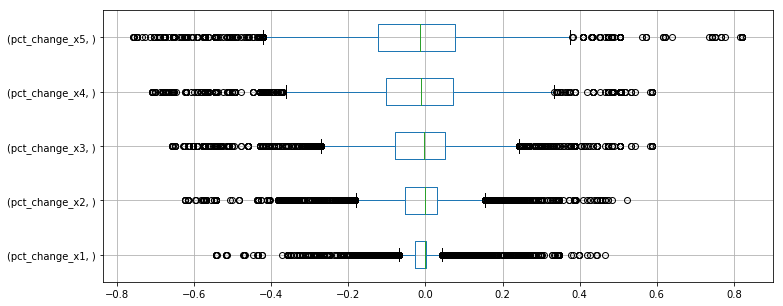

In [38]:
%matplotlib inline
vrem[['pct_change_x%i' %(n+1) for n in range(per_num)]].boxplot(vert=False, figsize=(12,5))
vrem[['pct_change_x%i' %(n+1) for n in range(per_num)]].describe()

In [39]:
#Разделяем наши процентные изменения на равные группы по силе изменений
def chunkIt(seq, num, min_max=True):
    avg = len(seq) / float(num)
    out = []
    last = 0.0
    while last < len(seq):
        if min_max:
            s = seq[int(last):int(last + avg)]
            out.append({'min': min(s), 'max':max(s)})
        else:
            out.append(seq[int(last):int(last + avg)])
        last += avg
    return out

class_list = chunkIt(vrem[['pct_change_x5']].sort_values(by='pct_change_x5').get_values().reshape(-1), 9)
class_list

[{'min': -0.7570005292101056, 'max': -0.2316584427919488},
 {'min': -0.2316584427919488, 'max': -0.14328067006578182},
 {'min': -0.14328067006578182, 'max': -0.0818817349658163},
 {'min': -0.0817857060189664, 'max': -0.03398864470278706},
 {'min': -0.03398864470278706, 'max': 0.0},
 {'min': 0.0, 'max': 0.03889506888317129},
 {'min': 0.03889506888317129, 'max': 0.08982847407752459},
 {'min': 0.08988137208563174, 'max': 0.16873883063990291},
 {'min': 0.16873883063990291, 'max': 0.8211572407250456}]

In [40]:
#Проставляем целевые категории
def classification(x, class_list):
    for i,v in enumerate(class_list):
        if v['min'] <= x <= v['max']:
            return i
vrem['Y'] = vrem['pct_change_x5'].apply(lambda x: classification(x, class_list)).astype('int')#, errors='ignore')

In [41]:
vrem[::per]

,,bid,ask,target,pct_change_x1,pct_change_x2,pct_change_x3,pct_change_x4,pct_change_x5,Y
,,price,price,,,,,,,
time,position,,,,,,,,,
2018-09-25 03:00:01.500,0,6585.0,6585.1,6585.05,-0.053151,-0.182231,-0.355350,-0.297644,-0.297644,0
2018-09-25 03:01:01.500,0,6581.5,6581.6,6581.55,-0.129149,-0.302360,-0.244623,-0.244623,-0.244623,0
2018-09-25 03:02:01.500,0,6573.0,6573.1,6573.05,-0.173435,-0.115624,-0.115624,-0.115624,-0.115624,2
2018-09-25 03:03:01.500,0,6561.6,6561.7,6561.65,0.057912,0.057912,0.057912,0.057912,-0.100584,2
2018-09-25 03:04:01.500,0,6565.4,6565.5,6565.45,0.000000,0.000000,0.000000,-0.158405,-0.371642,0
2018-09-25 03:05:01.500,0,6565.4,6565.5,6565.45,0.000000,0.000000,-0.158405,-0.371642,-0.162974,1
2018-09-25 03:06:01.500,0,6565.4,6565.5,6565.45,0.000000,-0.158405,-0.371642,-0.162974,-0.162974,1
2018-09-25 03:07:01.500,0,6565.4,6565.5,6565.45,-0.158405,-0.371642,-0.162974,-0.162974,-0.351842,0


In [42]:
df['Y', ''] = vrem['Y'].fillna(method='ffill')
df['Y', ''] = df['Y', ''].fillna(method='ffill')
df['bid','num'] = df['bid','num'].astype('int8')
df['ask','num'] = df['ask','num'].astype('int8')
df['Y', ''] = df['Y', ''].astype('int8')

In [43]:
df[df['Y'] > 7][::positions]
#df[::15].tail()

bid                                   ask  \
                                 num       summ      total   price   price   
time                    position                                             
2018-09-25 03:17:05.500 0          2   1.705000   1.705000  6512.7  6516.1   
2018-09-25 03:17:07.500 0          4   2.768000   2.768000  6513.1  6513.2   
2018-09-25 03:17:09.500 0          1   2.000000   2.000000  6512.7  6512.8   
2018-09-25 03:17:11.500 0          1   0.099315   0.099315  6511.0  6511.1   
2018-09-25 03:17:13.500 0          1   0.039432   0.039432  6510.9  6511.0   
2018-09-25 03:17:15.500 0          2   0.623758   0.623758  6510.3  6510.4   
2018-09-25 03:17:17.500 0          2   0.623758   0.623758  6510.3  6510.4   
2018-09-25 03:17:19.500 0          2   0.623758   0.623758  6510.3  6510.4   
2018-09-25 03:17:21.500 0         15  13.747406  13.747406  6510.0  6510.1   
2018-09-25 03:17:23.500 0         15  13.747406  13.747406  6510.0  6510.1   
2018-09-25 03:17:25.500 0         16  16.747406  16.747406  6510.0  6510.1   
2018-09-25 03:17:27.500 0         25  18.173406  18.173406  6510.0  6510.1   
2018-09-25 03:17:29.500 0         25  18.173406  18.173406  6510.0  6510.1   
2018-09-25 03:17:31.500 0         25  18.173406  18.173406  6510.0  6510.1   
2018-09-25 03:17:33.500 0         25  14.114049  14.114049  6510.0  6510.1   
2018-09-25 03:17:35.500 0         21  12.883715  12.883715  6510.0  6510.1   
2018-09-25 03:17:37.500 0         13  12.149915  12.149915  6510.0  6510.1   
2018-09-25 03:17:39.500 0         23  15.947915  15.947915  6510.0  6510.1   
2018-09-25 03:17:41.500 0         23  15.675782  15.675782  6510.0  6510.1   
2018-09-25 03:17:43.500 0         26  17.188861  17.188861  6510.0  6510.1   
2018-09-25 03:17:45.500 0         26  17.188861  17.188861  6510.0  6510.1   
2018-09-25 03:17:47.500 0         28  20.363402  20.363402  6510.0  6510.1   
2018-09-25 03:17:49.500 0         23  17.433777  17.433777  6510.0  6510.1   
2018-09-25 03:17:51.500 0         21  16.956972  16.956972  6510.0  6510.1   
2018-09-25 03:17:53.500 0         24  17.430504  17.430504  6510.0  6510.1   
2018-09-25 03:17:55.500 0         24  17.003699  17.003699  6510.0  6510.1   
2018-09-25 03:17:57.500 0         24  17.003699  17.003699  6510.0  6510.1   
2018-09-25 03:17:59.500 0         24  17.003699  17.003699  6510.0  6510.1   
2018-09-25 03:18:01.500 0         23  17.088807  17.088807  6510.0  6510.1   
2018-09-25 03:18:03.500 0         27  17.645155  17.645155  6510.0  6510.1   
...                               ..        ...        ...     ...     ...   
2018-09-25 06:57:47.500 0          1   0.712746   0.712746  6457.1  6457.8   
2018-09-25 06:57:49.500 0          1   2.662223   2.662223  6457.2  6457.3   
2018-09-25 06:57:51.500 0          1   2.662223   2.662223  6457.2  6457.3   
2018-09-25 06:57:53.500 0          1   2.662223   2.662223  6457.2  6457.3   
2018-09-25 06:57:55.500 0          1   2.662223   2.662223  6457.2  6457.3   
2018-09-25 06:57:57.500 0          1   2.662223   2.662223  6457.2  6457.3   
2018-09-25 06:57:59.500 0          1   2.662223   2.662223  6457.2  6457.3   
2018-09-25 06:58:01.500 0          1   2.662223   2.662223  6457.2  6457.3   
2018-09-25 06:58:03.500 0          1   2.659223   2.659223  6457.2  6457.3   
2018-09-25 06:58:05.500 0          1   2.659223   2.659223  6457.2  6457.3   
2018-09-25 06:58:07.500 0          1   2.659223   2.659223  6457.2  6457.3   
2018-09-25 06:58:09.500 0          1   2.654223   2.654223  6457.2  6457.3   
2018-09-25 06:58:11.500 0          1   2.654223   2.654223  6457.2  6457.3   
2018-09-25 06:58:13.500 0          1   2.654223   2.654223  6457.2  6457.3   
2018-09-25 06:58:15.500 0          1   2.654223   2.654223  6457.2  6457.3   
2018-09-25 06:58:17.500 0          1   2.654223   2.654223  6457.2  6457.3   
2018-09-25 06:58:19.500 0          1   2.654223   2.654223  6457.2  6457.3   
2018-09-25 06:58:21.500 0          1   2.654223   2.654

In [64]:
def split_data(data, k=0.75, positions_len=positions):
    split_ = int(len(data) // positions_len * k)
    while split_ % positions_len != 0:
        split_ += 1
    split_ *= positions_len
    return data[:split_], data[split_:]
    

def greate_data_set(df, windows=per, positions_len=positions):
    X = []
    Y = []
    for i in log_progress(range(len(df // positions_len))):
        i += 1
        if i >= windows:
            t = df.iloc[i-windows:i, 0:8].get_values().reshape(-1, positions_len*8)
            X.append(t)
            Y.append(df.iloc[i-windows:i-windows+1, 8:9].get_values())
    return np.array(X), np.array(Y)


In [69]:
df.iloc[30-per:30, 0:8]#.get_values().reshape(-1, positions_len*8)

bid                                   ask  \
                                 num       summ      total   price   price   
time                    position                                             
2018-09-25 03:00:01.500 0          6  20.850214  20.850214  6585.0  6585.1   
                        1          1   0.119244  20.969458  6584.3  6585.2   
                        2          1   0.500000  21.469458  6583.1  6585.4   
                        3          1   0.460368  21.929826  6583.0  6585.7   
                        4          1   0.400000  22.329826  6582.5  6585.8   
                        5          1   1.880000  24.209826  6581.6  6586.0   
                        6          2   0.192097  24.401923  6581.5  6586.4   
                        7          1   5.973000  30.374923  6580.5  6587.0   
                        8          1   2.280000  32.654923  6580.4  6587.2   
                        9          1   0.005253  32.660176  6579.3  6587.4   
                        10         1   0.033510  32.693686  6579.1  6587.5   
                        11         1   0.136673  32.830359  6579.0  6587.9   
                        12         1   3.400000  36.230359  6578.9  6588.0   
                        13         1   0.200000  36.430359  6578.2  6588.3   
                        14         1   1.000000  37.430359  6578.1  6588.5   
2018-09-25 03:00:03.500 0          6  21.107564  21.107564  6585.0  6585.1   
                        1          1   0.119244  21.226808  6584.3  6586.8   
                        2          1   0.210000  21.436808  6583.2  6586.9   
                        3          2   0.900000  22.336808  6583.1  6587.4   
                        4          1   0.460368  22.797176  6583.0  6587.5   
                        5          2   0.800000  23.597176  6582.8  6587.9   
                        6          3   2.305000  25.902176  6581.6  6588.0   
                        7          2   0.192097  26.094273  6581.5  6588.2   
                        8          1   2.266000  28.360273  6581.3  6588.3   
                        9          1   5.973000  34.333273  6580.5  6588.5   
                        10         1   2.280000  36.613273  6580.4  6588.9   
                        11         1   0.005253  36.618526  6579.3  6589.0   
                        12         1   0.033510  36.652036  6579.1  6589.9   
                        13         1   0.136673  36.788709  6579.0  6590.0   
                        14         1   3.400000  40.188709  6578.9  6590.1   

                                                            
                                      total       summ num  
time                    position                            
2018-09-25 03:00:01.500 0         13.917619  13.917619  10  
                        1         18.815470   4.897851   1  
                        2         20.675470   1.860000   1  
                        3         20.686999   0.011529   1  
                        4         21.113397   0.426397   1  
                        5         21.483896   0.370499   1  
                        6         21.495425   0.011529   1  
                        7         22.125761   0.630336   1  
                        8         22.160364   0.034603   1  
                        9         23.660364   1.500000   1  
                        10        24.060364   0.400000   1  
                        11        25.783287   1.722923   2  
                        12        25.873499   0.090213   1  
                        13        26.273499   0.400000   1  
                        14        26.276780   0.003281   1  
2018-09-25 03:00:03.500 0         10.547711  10.547711   5  
                        1         10.571711   0.024000   1  
                        2         11.651877   1.080167   2  
                        3         11.663406   0.011529   1  
                        4         13.163406   1.500000   1  
                        5         15.123760   1.960354 

In [45]:
train, test = split_data(df)

In [67]:
import sys
sys.getsizeof(testX) // 1024
testX[0]

array([[2.00000000e+00, 1.57200000e+00, 1.57200000e+00, 6.46790000e+03,
        6.46800000e+03, 8.55258859e+01, 8.55258859e+01, 1.80000000e+01,
        1.00000000e+00, 1.50000000e+00, 3.07200000e+00, 6.46780000e+03,
        6.46900000e+03, 8.70718859e+01, 1.54600000e+00, 1.00000000e+00,
        1.00000000e+00, 2.30900000e+00, 5.38100000e+00, 6.46560000e+03,
        6.46990000e+03, 8.74718859e+01, 4.00000000e-01, 1.00000000e+00,
        1.00000000e+00, 4.39713930e-01, 5.82071393e+00, 6.46460000e+03,
        6.47070000e+03, 8.79718859e+01, 5.00000000e-01, 1.00000000e+00,
        3.00000000e+00, 5.40795790e-01, 6.36150972e+00, 6.46440000e+03,
        6.47150000e+03, 8.81437137e+01, 1.71827770e-01, 1.00000000e+00,
        1.00000000e+00, 6.18028250e-01, 6.97953797e+00, 6.46430000e+03,
        6.47160000e+03, 8.85437137e+01, 4.00000000e-01, 1.00000000e+00,
        2.00000000e+00, 1.73605651e+00, 8.71559448e+00, 6.46410000e+03,
        6.47170000e+03, 8.89313278e+01, 3.87614120e-01, 1.000000

In [65]:
testX, testY = greate_data_set(test)

In [81]:
df[:23370*15].tail(15)

bid                                   ask  \
                             num       summ      total   price   price   
time                position                                             
2018-09-25 06:14:46 0          5  14.636688  14.636688  6479.2  6479.3   
                    1          1   1.500000  16.136688  6479.1  6480.0   
                    2          1   0.543519  16.680207  6477.9  6480.5   
                    3          3   4.711910  21.392116  6477.6  6480.8   
                    4          2   0.800000  22.192116  6476.2  6481.6   
                    5          1   4.700000  26.892116  6475.8  6482.5   
                    6          1   0.457035  27.349152  6475.5  6482.7   
                    7          1   0.154234  27.503386  6475.3  6483.0   
                    8          1   0.077129  27.580515  6475.1  6483.3   
                    9          1   0.308516  27.889031  6474.8  6484.6   
                    10         1   3.110000  30.999031  6474.0  6484.7   
                    11         4   0.597459  31.596490  6473.0  6484.8   
                    12         1   0.500000  32.096490  6472.9  6485.0   
                    13         2   5.700000  37.796490  6472.5  6485.4   
                    14         1   0.200000  37.996490  6472.4  6486.0   

                                                        Y  
                                  total       summ num     
time                position                               
2018-09-25 06:14:46 0         10.475564  10.475564   7  3  
                    1         19.475564   9.000000   1  3  
                    2         19.552927   0.077362   1  3  
                    3         19.952927   0.400000   1  3  
                    4         23.452927   3.500000   2  3  
                    5         26.452927   3.000000   1  3  
                    6         26.486433   0.033506   1  3  
                    7         26.536433   0.050000   1  3  
                    8         26.736433   0.200000   1  3  
                    9         27.036433   0.300000   2  3  
                    10        27.081354   0.044922   1  3  
                    11        28.581354   1.500000   1  3  
                    12        28.702219   0.120865   2  3  
                    13        28.705405   0.003186   1  3  
                    14        29.205405   0.500000   1  3

In [65]:
df.iloc[0:15, 0:8].get_values().reshape(-1,15*8)#[0, :]
df.iloc[0:1, 8:9].get_values()#.reshape(-1,15*8)#[0, :]

array([[0]], dtype=int8)

In [54]:
df.head(30)

bid                                   ask  \
                                 num       summ      total   price   price   
time                    position                                             
2018-09-25 03:00:01.500 0          6  20.850214  20.850214  6585.0  6585.1   
                        1          1   0.119244  20.969458  6584.3  6585.2   
                        2          1   0.500000  21.469458  6583.1  6585.4   
                        3          1   0.460368  21.929826  6583.0  6585.7   
                        4          1   0.400000  22.329826  6582.5  6585.8   
                        5          1   1.880000  24.209826  6581.6  6586.0   
                        6          2   0.192097  24.401923  6581.5  6586.4   
                        7          1   5.973000  30.374923  6580.5  6587.0   
                        8          1   2.280000  32.654923  6580.4  6587.2   
                        9          1   0.005253  32.660176  6579.3  6587.4   
                        10         1   0.033510  32.693686  6579.1  6587.5   
                        11         1   0.136673  32.830359  6579.0  6587.9   
                        12         1   3.400000  36.230359  6578.9  6588.0   
                        13         1   0.200000  36.430359  6578.2  6588.3   
                        14         1   1.000000  37.430359  6578.1  6588.5   
2018-09-25 03:00:02.000 0          6  20.850214  20.850214  6585.0  6585.1   
                        1          1   0.119244  20.969458  6584.3  6585.7   
                        2          1   0.500000  21.469458  6583.1  6587.0   
                        3          1   0.460368  21.929826  6583.0  6587.4   
                        4          1   1.880000  23.809826  6581.6  6587.5   
                        5          2   0.192097  24.001923  6581.5  6587.9   
                        6          1   5.973000  29.974923  6580.5  6588.0   
                        7          1   2.280000  32.254923  6580.4  6588.3   
                        8          1   0.005253  32.260176  6579.3  6588.5   
                        9          1   0.033510  32.293686  6579.1  6588.9   
                        10         1   0.136673  32.430359  6579.0  6589.0   
                        11         1   3.400000  35.830359  6578.9  6589.3   
                        12         1   0.200000  36.030359  6578.2  6589.7   
                        13         1   1.000000  37.030359  6578.1  6589.9   
                        14         1   0.500000  37.530359  6577.2  6590.0   

                                                            Y  
                                      total       summ num     
time                    position                               
2018-09-25 03:00:01.500 0         13.917619  13.917619  10  0  
                        1         18.815470   4.897851   1  0  
                        2         20.675470   1.860000   1  0  
                        3         20.686999   0.011529   1  0  
                        4         21.113397   0.426397   1  0  
                        5         21.483896   0.370499   1  0  
                        6         21.495425   0.011529   1  0  
                        7         22.125761   0.630336   1  0  
                        8         22.160364   0.034603   1  0  
                        9         23.660364   1.500000   1  0  
                        10        24.060364   0.400000   1  0  
                        11        25.783287   1.722923   2  0  
                        12        25.873499   0.090213   1  0  
                        13        26.273499   0.400000   1  0  
                        14        26.276780   0.003281   1  0  
2018-09-25 03:00:02.000 0         13.917619  13.917619  10  0  
                        1         13.929148   0.011529   1  0  
                        2         14.559485   0.630336   1  0  
                        3         16.059485   1.500000   1  0  
                        4         16.459485   0.40

In [56]:
from IPython.display import display
from ipywidgets import interactive, interactive_output
def f(a, b):
    display(a + b)
    return a+b
w = interactive(f, a=10, b=20)
while True:
    display(w)
    time.sleep(100)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

KeyboardInterrupt: 

In [81]:
import time
from IPython.display import display
from ipywidgets import interactive, interact


def f(df):
    display(df[:25])
    #return a

w = interactive(f, a=df)

ValueError: cannot find widget or abbreviation for argument: 'df'

In [80]:
f(df)

bid                                   ask             \
                        num       summ      total   price   price      total   
time                                                                           
2018-09-17 00:27:21 0   9.0  11.412111  11.412111  6506.0  6506.1   1.629327   
                    1   1.0   0.016000  11.428111  6505.3  6507.1   1.652153   
                    2   2.0   0.498100  11.926211  6505.2  6507.6   3.202643   
                    3   1.0   0.478786  12.404998  6505.0  6508.2   3.702643   
                    4   1.0   1.200000  13.604998  6504.9  6508.9   3.722492   
                    5   2.0   0.797000  14.401998  6504.2  6509.2   3.849321   
                    6   2.0   0.600000  15.001998  6504.1  6509.3   4.652321   
                    7   1.0   1.500000  16.501998  6504.0  6510.0   5.652321   
                    8   1.0   0.300000  16.801998  6503.6  6510.1   6.052321   
                    9   1.0   0.443770  17.245768  6503.5  6510.9   6.098425   
                    10  3.0   0.661285  17.907052  6503.2  6511.0   7.598425   
                    11  3.0   1.075230  18.982282  6503.1  6511.5   7.621336   
                    12  4.0   1.857346  20.839627  6502.6  6511.6  10.804624   
                    13  1.0   0.200000  21.039627  6502.2  6512.0  10.850442   
                    14  2.0   1.600000  22.639627  6502.0  6512.2  11.233345   
                    15  1.0   0.200000  22.839627  6501.2  6513.0  12.793345   
                    16  1.0   0.076822  22.916449  6501.1  6513.7  15.186369   
                    17  4.0   1.400708  24.317157  6501.0  6513.9  18.186369   
                    18  1.0   0.153644  24.470801  6500.9  6514.1  19.986369   
                    19  1.0   0.040971  24.511772  6500.8  6514.3  22.293369   
                    20  1.0   0.010256  24.522027  6500.5  6514.7  22.693369   
                    21  1.0   3.813481  28.335508  6500.4  6514.8  25.693369   
                    22  2.0   2.970527  31.306035  6500.3  6514.9  25.772369   
                    23  2.0   2.614573  33.920608  6500.1  6515.0  28.337529   
                    24  4.0   1.857305  35.777913  6500.0  6515.4  28.537529   

                                       
                            summ  num  
time                                   
2018-09-17 00:27:21 0   1.629327  4.0  
                    1   0.022826  2.0  
                    2   1.550489  1.0  
                    3   0.500000  1.0  
                    4   0.019850  1.0  
                    5   0.126829  3.0  
                    6   0.803000  3.0  
                    7   1.000000  1.0  
                    8   0.400000  1.0  
                    9   0.046104  1.0  
                    10  1.500000  1.0  
                    11  0.022911  1.0  
                    12  3.183288  9.0  
                    13  0.045818  2.0  
                    14  0.382903  1.0  
                    15  1.560000  2.0  
                    16  2.393023  4.0  
                    17  3.000000  1.0  
                    18  1.800000  1.0  
                    19  2.307000  1.0  
                    20  0.400000  1.0  
                    21  3.000000  1.0  
                    22  0.079000  1.0  
                    23  2.565160  3.0  
                    24  0.200000  1.0

In [308]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [95]:
import ipywidgets as widgets

out = widgets.Output(layout={'border': '1px solid black'})

with out:
    for i in range(10):
        print(i, 'Hello world!')
        display(w)
out
# for i in range(10):
#     w = widgets.HTML(
#         value="Hello <b>%s</b>" %i,
#         placeholder='Some HTML',
#         description='Some HTML2222',
#     )
# w

Output(layout=Layout(border='1px solid black'))

In [96]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

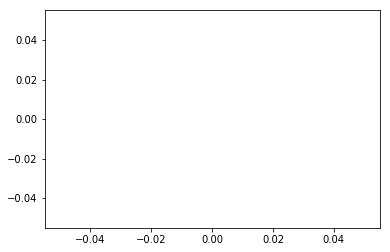

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
line, = ax.plot([], [], color='g')
time_template = 'time = %s'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

In [101]:
import time
import psutil  # !pip install psutil

def frames():    
    while True:        
        yield time.time(), psutil.cpu_percent(.15) # CPU % over the second

In [121]:
import subprocess
 
process = subprocess.Popen('htop')
code = process.wait()
 
print(code)

0


In [12]:
display_handle = display(None, display_id=True)
display_handle?

None

In [11]:
from IPython.display import display
import time
display_handle = display(None, display_id=True)

def foo(df):
    display_handle.update(df)
    
for i in range(0,100):
    time.sleep(2)
    display_handle.update(i)
    

# def animate(args):
#     xx.append(args[0])
#     yy.append(args[1])
#     line.set_data(xx, yy)
#     time_text.set_text(time_template % DT.datetime.fromtimestamp(args[0]))
#     ax.relim()  # update axes limits
#     ax.autoscale_view(True, True, True)
#     display_handle.update(fig)

# for x_y in frames():
#     animate(x_y)

2

KeyboardInterrupt: 

In [103]:
%matplotlib notebook
from matplotlib import animation

ani = animation.FuncAnimation(fig, animate, frames=frames)


In [105]:
from IPython.display import HTML

HTML(ani.to_html5_video())

KeyboardInterrupt: 

In [107]:
df[:25]

bid                                   ask             \
                        num       summ      total   price   price      total   
time                                                                           
2018-09-17 00:27:21 0   9.0  11.412111  11.412111  6506.0  6506.1   1.629327   
                    1   1.0   0.016000  11.428111  6505.3  6507.1   1.652153   
                    2   2.0   0.498100  11.926211  6505.2  6507.6   3.202643   
                    3   1.0   0.478786  12.404998  6505.0  6508.2   3.702643   
                    4   1.0   1.200000  13.604998  6504.9  6508.9   3.722492   
                    5   2.0   0.797000  14.401998  6504.2  6509.2   3.849321   
                    6   2.0   0.600000  15.001998  6504.1  6509.3   4.652321   
                    7   1.0   1.500000  16.501998  6504.0  6510.0   5.652321   
                    8   1.0   0.300000  16.801998  6503.6  6510.1   6.052321   
                    9   1.0   0.443770  17.245768  6503.5  6510.9   6.098425   
                    10  3.0   0.661285  17.907052  6503.2  6511.0   7.598425   
                    11  3.0   1.075230  18.982282  6503.1  6511.5   7.621336   
                    12  4.0   1.857346  20.839627  6502.6  6511.6  10.804624   
                    13  1.0   0.200000  21.039627  6502.2  6512.0  10.850442   
                    14  2.0   1.600000  22.639627  6502.0  6512.2  11.233345   
                    15  1.0   0.200000  22.839627  6501.2  6513.0  12.793345   
                    16  1.0   0.076822  22.916449  6501.1  6513.7  15.186369   
                    17  4.0   1.400708  24.317157  6501.0  6513.9  18.186369   
                    18  1.0   0.153644  24.470801  6500.9  6514.1  19.986369   
                    19  1.0   0.040971  24.511772  6500.8  6514.3  22.293369   
                    20  1.0   0.010256  24.522027  6500.5  6514.7  22.693369   
                    21  1.0   3.813481  28.335508  6500.4  6514.8  25.693369   
                    22  2.0   2.970527  31.306035  6500.3  6514.9  25.772369   
                    23  2.0   2.614573  33.920608  6500.1  6515.0  28.337529   
                    24  4.0   1.857305  35.777913  6500.0  6515.4  28.537529   

                                       
                            summ  num  
time                                   
2018-09-17 00:27:21 0   1.629327  4.0  
                    1   0.022826  2.0  
                    2   1.550489  1.0  
                    3   0.500000  1.0  
                    4   0.019850  1.0  
                    5   0.126829  3.0  
                    6   0.803000  3.0  
                    7   1.000000  1.0  
                    8   0.400000  1.0  
                    9   0.046104  1.0  
                    10  1.500000  1.0  
                    11  0.022911  1.0  
                    12  3.183288  9.0  
                    13  0.045818  2.0  
                    14  0.382903  1.0  
                    15  1.560000  2.0  
                    16  2.393023  4.0  
                    17  3.000000  1.0  
                    18  1.800000  1.0  
                    19  2.307000  1.0  
                    20  0.400000  1.0  
                    21  3.000000  1.0  
                    22  0.079000  1.0  
                    23  2.565160  3.0  
                    24  0.200000  1.0

In [23]:
df[df.index.get_level_values(0)  >= pd.to_datetime('2018-09-17 10:00:00')]


bid                                  ask             \
                        num      summ      total   price   price      total   
time                                                                          
2018-09-17 10:00:00 0   1.0  0.327835   0.327835  6535.5  6463.2   0.260000   
                    1   3.0  4.144458   4.472294  6535.3  6463.3   0.660000   
                    2   1.0  2.800515   7.272809  6535.2  6463.4  -0.340000   
                    3   4.0  3.202679  10.475488  6535.1  6463.5   1.207923   
                    4   1.0  9.895000  20.370488  6535.0  6463.6   2.495847   
                    5   1.0  0.011615  20.382103  6534.9  6463.7   2.498547   
                    6   1.0  2.800515  23.182618  6534.5  6463.8   2.898547   
                    7   1.0  0.011615  23.194233  6534.1  6463.9   5.898547   
                    8   1.0  1.200000  24.394233  6534.0  6464.0   5.908547   
                    9   2.0  0.697000  25.091233  6533.9  6464.1   6.308547   
                    10  4.0  2.953005  28.044238  6533.8  6464.2   7.308547   
                    11  1.0  0.400000  28.444238  6533.7  6464.3   9.308547   
                    12  1.0  0.045929  28.490167  6533.6  6464.4  10.308547   
                    13  1.0  0.720000  29.210167  6533.5  6464.5  11.308547   
                    14  1.0  0.632119  29.842286  6533.4  6464.6  12.508547   
                    15  1.0  0.400000  30.242286  6533.3  6464.7  13.508547   
                    16  1.0  0.011616  30.253902  6533.2  6464.8  14.508547   
                    17  1.0  0.765000  31.018902  6533.1  6464.9  14.908547   
                    18  1.0  0.760000  31.778902  6533.0  6465.0  15.908547   
                    19  1.0  0.011619  31.790522  6532.9  6465.1  16.708547   
                    20  2.0  0.800000  32.590522  6532.8  6465.2  16.908547   
                    21  1.0  0.400000  32.990522  6532.7  6465.3  17.158547   
                    22  1.0  0.765000  33.755522  6532.6  6465.4  17.798447   
                    23  1.0  0.011619  33.767141  6532.5  6465.5  18.198447   
                    24  3.0  0.524439  34.291580  6476.9  6484.0  17.236333   
2018-09-17 10:00:01 0   1.0  0.327835   0.327835  6535.5  6463.2   0.260000   
                    1   3.0  4.144458   4.472294  6535.3  6463.3   0.660000   
                    2   1.0  2.800515   7.272809  6535.2  6463.4  -0.340000   
                    3   4.0  3.202679  10.475488  6535.1  6463.5   1.207923   
                    4   1.0  9.895000  20.370488  6535.0  6463.6   2.495847   
...                     ...       ...        ...     ...     ...        ...   
2018-09-17 11:28:20 20  2.0  0.800000  32.590522  6532.8  6462.8  11.815541   
                    21  1.0  0.400000  32.990522  6532.7  6462.9  12.615541   
                    22  1.0  0.765000  33.755522  6532.6  6463.0  13.015541   
                    23  1.0  0.011619  33.767141  6532.5  6463.1  15.897235   
                    24  1.0  3.000000  36.767141  6464.6  6474.7  15.597235   
2018-09-17 11:28:21 0   1.0  0.327835   0.327835  6535.5  6460.8   7.168730   
                    1   3.0  4.144458   4.472294  6535.3  6460.9   6.168730   
                    2   1.0  2.800515   7.272809  6535.2  6461.0   6.188730   
                    3   4.0  3.202679  10.475488  6535.1  6461.1   5.388730   
                    4   1.0  9.895000  20.370488  6535.0  6461.2   5.788730   
                    5   1.0  0.011615  20.382103  6534.9  6461.3   6.188730   
                    6   1.0  2.800515  23.182618  6534.5  6461.4   6.588730   
                    7   1.0  0.011615  23.194233  6534.1  6461.5   6.988730   
                    8   1.0  1.200000  24.394233  6534.0  6461.6   7.128005   
                    9   2.0  0.697000  25.091233  6533.9  6461.7   7.628005   
                    10  4.0  2.953005  28.044238  6533.8  6461.8   7.767280   
                    11  1.0  0.400000  28.444238  6533.7  6461.9   8.16728

In [165]:
import json
from datetime import datetime
from threading import Thread

from IPython.display import display

from websocket import create_connection

import json
import pandas as pd
import numpy as np
import time
from datetime import timedelta, datetime


from IPython.display import display


display_handle = display(None, display_id=True)
def foo(df):
    display_handle.update(df)
    
ws = create_connection("wss://api2.bitfinex.com:3000/ws")
ws.send(json.dumps({
    "event": "subscribe",
    "channel": "book",
    "pair": "tBTCUSD",
    "prec": "P0"
}))

def _update(df, result):
    try:
        if result[-1] > 0:
            T = 'bid'
            ascending=False
            add = [result[-2], np.abs(result[-1]), 0, result[1]]
        elif result[-1] < 0:
            T = 'ask'
            ascending=True
            add = [result[-2], np.abs(result[-1]), 0, result[1]][::-1]
        if result[-2] > 0: # need add/update
            if len(df[df[T,'price'] == result[1]].index) > 0: #цена есть | update
                df.loc[df[df[T,'price'] == result[1]].index, (T,'summ')] = np.abs(result[-1])
                df.loc[df[df[T,'price'] == result[1]].index, (T,'num')] = result[-2]
                df[T,'total'] = df[T,'summ'].cumsum()
            else: # no price | add
                df.loc[len(df)-1, T] = add
                df[T] = df[T].sort_values(by='price', ascending=ascending).reset_index(drop=True)
                df[T,'total'] = df[T,'summ'].cumsum()
        elif result[-2] == 0: # need delete
            df.loc[df[df[T,'price'] == result[1]].index, T] = np.nan
            df[T] = df[T].sort_values(by='price', ascending=ascending).reset_index(drop=True)
            df[T,'total'] = df[T,'summ'].cumsum()
#             df[T].drop(df[df[T,'price'] == result[1]].index).reset_index(drop=True)
    except Exception as err:
        print(err, result)
    return df

inf1 = ws.recv()
inf2 = ws.recv()
ob = ws.recv()

columns = [('bid', 'num'), ('bid', 'summ'), ('bid', 'total'), ('bid', 'price'),
           ('ask', 'price'), ('ask', 'total'), ('ask', 'summ'), ('ask', 'num')]
pd.DataFrame(json.loads(ob)[1])
df = pd.DataFrame(np.zeros(25*8).reshape(-1,8), columns=columns)
df.columns = pd.MultiIndex.from_tuples(df.columns)

df_ = pd.DataFrame(json.loads(ob)[1], columns=['price', 'num', 'summ'])
df_bid = df_[df_['summ'] > 0]
df_ask = df_[df_['summ'] < 0].apply(np.abs)
df['bid','num'] = df_bid['num']
df['bid','summ'] = df_bid['summ']
df['bid','price'] = df_bid['price']
df['bid','total'] = df_bid['summ'].cumsum()
df['ask','num'] = df_ask['num'].reset_index(drop=True)
df['ask','summ'] = df_ask['summ'].reset_index(drop=True)
df['ask','price'] = df_ask['price'].reset_index(drop=True)
df['ask','total'] = df_ask['summ'].cumsum().reset_index(drop=True)

df['time'] = datetime.now().replace(microsecond=0)#int(time.time())

app_check = time.time() + 1
write_chek = time.time() + 10


result = ws.recv()
result = json.loads(result)
D = datetime.now().replace(microsecond=0)#int('%.2s'%datetime.now().microsecond)) #int(time.time())
#print ("%s '%s'" % (D, result))
if len(result) > 2:
    _update(df,result)
    df['time'] = D#datetime.now()#time.time()
display_handle.update(df)


# if time.time() > write_chek:
#     df_glob.to_pickle('bitfinex_ob_log//bitfinex_ob_log_%s.pkl' %datetime.now().strftime('%Y_%m_%d-%H'))
#     print ("%s 'file saved!'" % (D))
#     write_chek += 300



        
    

bid                                   ask            \
                         num       summ      total   price   price     total   
time                                                                           
2018-09-18 18:57:13 0   23.0  16.347499  16.347499  6355.7  6355.8  0.992000   
                    1    7.0  10.992703  27.340202  6355.6  6356.0  0.994000   
                    2    1.0   0.011940  27.352142  6355.4  6358.1  0.996000   
                    3    1.0   3.000000  30.352142  6355.0  6359.0  1.067601   
                    4    3.0   4.126805  34.478946  6354.9  6359.1  1.074296   
                    5    2.0   0.060000  34.538946  6354.3  6359.4  1.793513   
                    6    1.0   0.157234  34.696181  6354.1  6359.7  2.293513   
                    7    1.0   0.411116  35.107297  6354.0  6359.8  3.293513   
                    8    1.0   0.078686  35.185983  6353.2  6360.0  4.593513   
                    9    1.0   3.730000  38.915983  6353.0  6360.1  4.595548   
                    10   1.0   1.500000  40.415983  6352.4  6360.7  4.602342   
                    11   1.0   0.200000  40.615983  6352.3  6361.2  6.002342   
                    12   1.0   0.629028  41.245011  6352.2  6361.4  6.202342   
                    13   3.0   0.550429  41.795439  6352.1  6361.5  7.986674   
                    14   1.0   0.629061  42.424501  6351.9  6361.7  8.624285   

                                       
                            summ  num  
time                                   
2018-09-18 18:57:13 0   0.992000  1.0  
                    1   0.002000  1.0  
                    2   0.002000  1.0  
                    3   0.071601  1.0  
                    4   0.006695  1.0  
                    5   0.719217  1.0  
                    6   0.500000  1.0  
                    7   1.000000  1.0  
                    8   1.300000  2.0  
                    9   0.002035  1.0  
                    10  0.006795  1.0  
                    11  1.400000  2.0  
                    12  0.200000  1.0  
                    13  1.784331  6.0  
                    14  0.637611  2.0

In [166]:
a = []

In [178]:

result = ws.recv()
result = json.loads(result)
D = datetime.now().replace(microsecond=0)#int('%.2s'%datetime.now().microsecond)) #int(time.time())
#print ("%s '%s'" % (D, result))
if len(result) > 2:
    _update(df,result)
    df['time'] = D#datetime.now()#time.time()
if time.time() > app_check:
    df_t = df.drop(range(len(df)-10,len(df)))
    df_t = df_t.set_index([df_t['time'],df_t.index]).drop(('time'), axis=1)
    #df_glob = pd.concat([df_glob, df_t])
    app_check += 1
display_handle.update(df_t)

/home/blm/venvs/jupyter/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [179]:
df_t.head()

bid                                   ask            \
                        num       summ      total   price   price     total   
time                                                                          
2018-09-18 18:57:13 0  23.0  16.347499  16.347499  6355.7  6355.8  0.992000   
                    1   7.0  10.992703  27.340202  6355.6  6356.0  0.994000   
                    2   1.0   0.011940  27.352142  6355.4  6358.1  0.996000   
                    3   1.0   3.000000  30.352142  6355.0  6359.0  1.067601   
                    4   3.0   4.126805  34.478946  6354.9  6359.1  1.074296   

                                      
                           summ  num  
time                                  
2018-09-18 18:57:13 0  0.992000  1.0  
                    1  0.002000  1.0  
                    2  0.002000  1.0  
                    3  0.071601  1.0  
                    4  0.006695  1.0

In [180]:
import pickle
with open('ttt.pkl', 'ab') as f:
    pickle.dump(df_t.head(), f)

In [227]:
D = datetime.now()
D

datetime.datetime(2018, 9, 18, 19, 18, 7, 308882)

In [222]:
def get_micro_sec(D):
    if round(D.microsecond / 10 **6) == 1:
        return 5 * (10 **5) 
    else:
        return 0

In [228]:
D = D.replace(microsecond=get_micro_sec(D))
D

datetime.datetime(2018, 9, 18, 19, 18, 7)

In [181]:
D = []

with open('ttt.pkl', 'rb') as f:
    while True:
        try:
            D.append(pickle.load(f))
        except EOFError:
            break
print(len(D))
    #     for i in f.readline():
#         
# f.close()
# print(D)
#len(f)

3


In [182]:
pd.concat(D)


bid                                   ask            \
                        num       summ      total   price   price     total   
time                                                                          
2018-09-18 18:54:23 0  23.0  16.347499  16.347499  6355.7  6355.8  0.992000   
                    1   7.0  10.992703  27.340202  6355.6  6356.0  0.994000   
                    2   1.0   0.011940  27.352142  6355.4  6358.1  0.996000   
                    3   1.0   3.000000  30.352142  6355.0  6359.0  1.067601   
                    4   3.0   4.126805  34.478946  6354.9  6359.1  1.074296   
2018-09-18 18:55:39 0  23.0  16.347499  16.347499  6355.7  6355.8  0.992000   
                    1   7.0  10.992703  27.340202  6355.6  6356.0  0.994000   
                    2   1.0   0.011940  27.352142  6355.4  6358.1  0.996000   
                    3   1.0   3.000000  30.352142  6355.0  6359.0  1.067601   
                    4   3.0   4.126805  34.478946  6354.9  6359.1  1.074296   
2018-09-18 18:57:13 0  23.0  16.347499  16.347499  6355.7  6355.8  0.992000   
                    1   7.0  10.992703  27.340202  6355.6  6356.0  0.994000   
                    2   1.0   0.011940  27.352142  6355.4  6358.1  0.996000   
                    3   1.0   3.000000  30.352142  6355.0  6359.0  1.067601   
                    4   3.0   4.126805  34.478946  6354.9  6359.1  1.074296   

                                      
                           summ  num  
time                                  
2018-09-18 18:54:23 0  0.992000  1.0  
                    1  0.002000  1.0  
                    2  0.002000  1.0  
                    3  0.071601  1.0  
                    4  0.006695  1.0  
2018-09-18 18:55:39 0  0.992000  1.0  
                    1  0.002000  1.0  
                    2  0.002000  1.0  
                    3  0.071601  1.0  
                    4  0.006695  1.0  
2018-09-18 18:57:13 0  0.992000  1.0  
                    1  0.002000  1.0  
                    2  0.002000  1.0  
                    3  0.071601  1.0  
                    4  0.006695  1.0

In [139]:

with open('ttt.pkl', 'rb') as f:
    unpickler = pickle.Unpickler(f)
    unpickler?
#f.close()
# print(unpickler.load())
# print(unpickler.load())
        #D.append()
#     for i in f.readline():
#         
# f.close()
# print(D)
#len(f)

In [89]:
import numpy as np

In [128]:
n = np.random.randn(32)
# a = [i for i in range(31)]#.append(-1)
a = np.ones(31, dtype=np.int16)
a = np.append(a, [-1])
# a = a.tolist()
print(a)
# n = n.reshape([-1,10,10,10])
n = n.reshape(a)
n

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1]


array([[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[ 0.46706901,
                                       0.72919648,
                                       0.0643793 ,
                                      -0.36896919,
                                       1.05150554,
                                       0.96421538,
                                      -0.98484163,
                                      -1.52133868,
                                       0.03502937,
                                       0.05045264,
                                      -1.57933925,
                                       0.56675185,
                                       1.07553157,
                                      -0.94850758,
                                       0.11039218,
                                      -1.18596605,
                                      -0.31931603,
                                      -0.62686811,
                                       0.6061434 ,
                               